# Predicting GDP Per Capita

## Introduction

### In this project, I explore a dataset I obtained from kaggle containing information regarding the countries of the world. This dataset includes many categories of information regarding each country including its region, population, net migration, GDP per capita, and birthrate among many others totaling 19 data points for each country. 
### After loading and cleaning the data, I will begin to analyze and visualize the data specifically highlighting the distribution of the data and each category's correlation to GDP per capita. Afterwards, I will build two machine learning models, one that uses a decision tree regressor and another that uses linear regression, and these will use the various data from a country as features to predict its GDP per capita. I will then compute the mean absolute error and root mean squared error for both of the models and compare their accuracy.

### Dataset created by Fernando Lasso: https://www.kaggle.com/fernandol/countries-of-the-world

## Load Data and Libraries

In [333]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv("data.csv", decimal = ",")

## Data Overview

In [348]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


#### Initial Look First 10 Rows of Data

In [133]:
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


#### Check for Missing Values

In [134]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

## Data Cleaning

### The dataset has missing values for several countries. Before I attempt to fill these in, I initially look to see how many rows would be omitted if I were to delete all the rows containining a null value. If most of the missing data belonged to only a few countries, it might be advantageous simply deleting these rows of data instead of trying to fill in the null values themselves. However doing so comes with its own disadvantages too. In addition to deleting a sizeable portion of the data (a reduction of over 21% of the data), this new dataset might introduce considerable bias into the model as the data was not deleted proportionally across the different regions (you can see a much higher proportion of Western European and North African data included null values than the Asian and Sub-Saharen African data). For these reasons, I decided it would be better to fill in the null values.

In [135]:
test_frame = pd.DataFrame(data)
test_frame = test_frame.dropna()
test_frame

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [45]:
original = data.Region.value_counts()
original

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

In [46]:
deleted = test_frame.Region.value_counts()
deleted

SUB-SAHARAN AFRICA                     47
LATIN AMER. & CARIB                    42
ASIA (EX. NEAR EAST)                   26
WESTERN EUROPE                         17
OCEANIA                                12
NEAR EAST                              12
C.W. OF IND. STATES                    10
EASTERN EUROPE                          6
NORTHERN AFRICA                         3
BALTICS                                 2
NORTHERN AMERICA                        2
Name: Region, dtype: int64

In [347]:
new = deleted/original
new

ASIA (EX. NEAR EAST)                   0.928571
BALTICS                                0.666667
C.W. OF IND. STATES                    0.833333
EASTERN EUROPE                         0.500000
LATIN AMER. & CARIB                    0.933333
NEAR EAST                              0.750000
NORTHERN AFRICA                        0.500000
NORTHERN AMERICA                       0.400000
OCEANIA                                0.571429
SUB-SAHARAN AFRICA                     0.921569
WESTERN EUROPE                         0.607143
Name: Region, dtype: float64

### Now, we will being to replace the null values. A reasonable assumption is that a country is similar to other countries located in the same region, so I will fill in the missing values with the median value for that category of data in the region of which the country belongs. Shown below are the median values for every category across the various regions. After using these values to fill in the missing data, we will check to see that there are no longer any null values in our dataset and that the correct values were imputed.

In [140]:
data.groupby("Region")[["Net migration", "Infant mortality (per 1000 births)", "GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"]].median()

,Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),0.000,30.775,3450.0,90.60,61.50,13.595,1.005,81.160,2.00,19.565,6.960,0.1610,0.2815,0.4950
BALTICS,-2.230,7.870,11400.0,99.80,321.40,29.670,0.470,69.860,3.00,9.240,13.250,0.0400,0.2940,0.6660
C.W. OF IND. STATES,-2.085,32.425,3450.0,99.05,155.35,11.135,0.875,86.520,2.75,15.850,9.325,0.1980,0.3295,0.4595
EASTERN EUROPE,0.085,9.330,9100.0,98.60,296.05,31.755,2.260,65.335,3.00,9.720,10.310,0.0815,0.3095,0.5910
LATIN AMER. & CARIB,-1.220,18.050,6300.0,94.05,222.85,7.600,1.980,87.230,2.00,18.020,6.090,0.0700,0.2590,0.6180
NEAR EAST,0.555,19.060,9250.0,83.00,211.00,5.305,2.780,89.660,1.00,21.595,4.560,0.0350,0.3520,0.5840
NORTHERN AFRICA,-0.390,31.000,6000.0,70.00,123.60,3.045,0.365,96.590,1.00,21.980,5.130,0.1320,0.3570,0.4255
NORTHERN AMERICA,2.490,7.540,29800.0,97.50,683.20,13.040,0.000,86.960,2.00,13.520,7.800,0.0100,0.2040,0.7870
OCEANIA,0.000,12.620,5000.0,95.00,118.60,5.710,6.990,84.400,2.00,22.320,5.690,0.1505,0.1710,0.6440


In [138]:
revised_data = data
for column in revised_data.columns:   
   if revised_data[column].isnull().sum() != 0:
        median_values = revised_data.groupby("Region")[column].median()
        for region in revised_data["Region"].unique():
            revised_data[column].loc[(revised_data[column].isnull()) & (revised_data["Region"] == region)] = median_values[region]


In [143]:
print(revised_data.isnull().sum())
revised_data

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,83.0,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.0900,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,-0.39,31.00,6000.0,70.0,123.6,0.02,0.00,99.98,1.0,21.98,5.13,0.1320,0.357,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.1350,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.2200,0.290,0.489


## Exploratory Analysis

### I will now begin to explore the dataset. First I will create a correlation heatmap to visualize what categories might be at least slight correlated with one another. I will then show the dispersion of data for each of the categories by using a histogram for GDP per capita and boxplots for the other categories. Finally I will use scatter plots to show the correlation between each of the categories to GDP per capita.

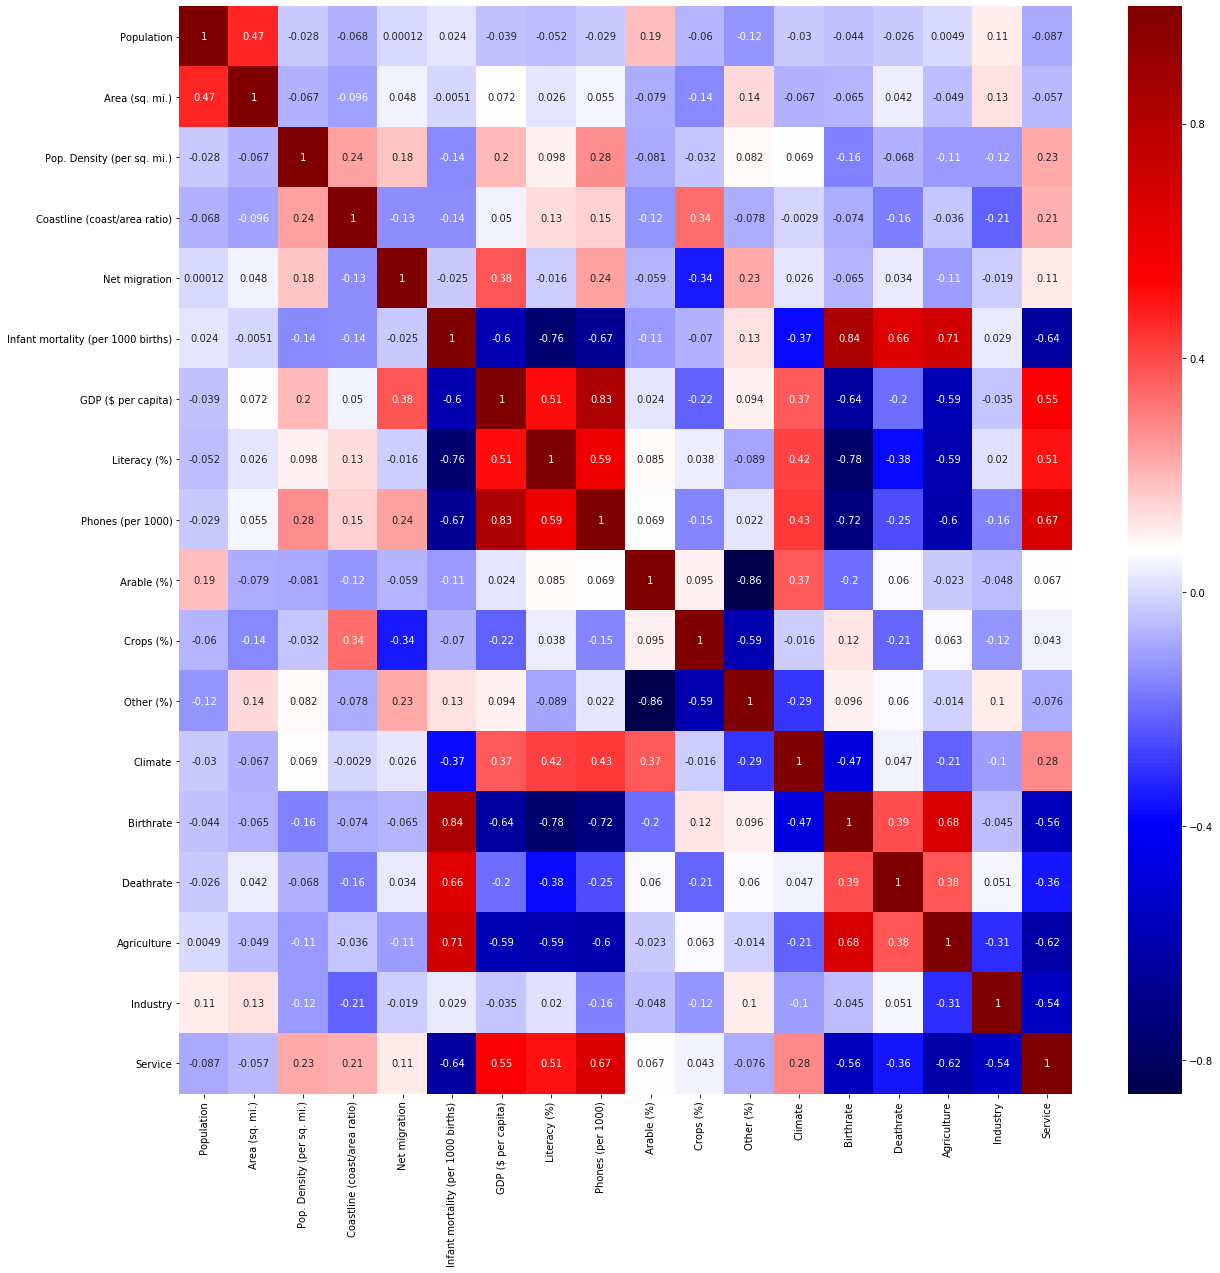

In [169]:
plt.figure(figsize = (20,20))
heat_map = sns.heatmap(data = revised_data.corr(), annot = True, cmap = "seismic")
bottom, top = plt.ylim()
bottom += 0.5
top -= 0.5
plt.ylim(bottom, top)
plt.show()

#### It is important to see the correlation between the categories of data themselves in an effort to gauge the accuracy and practicality of using a linear regression model. The linear regression model assumes independence of the features we supply it with, and while total independence perhaps isn't reasonable we can still look in the heatmap to see the collinearity within our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1264ea6a0>]],
      dtype=object)

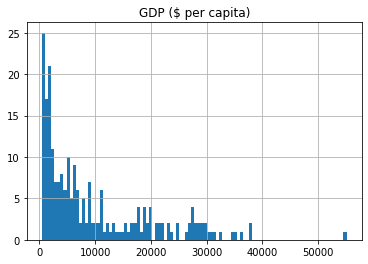

In [298]:
revised_data.hist(column = "GDP ($ per capita)", bins = 100)

#### The GDP per capita data is right-skewed, which could make the linear regression model less accurate since one of the assumptions of linear regression is having normally distributed variables.

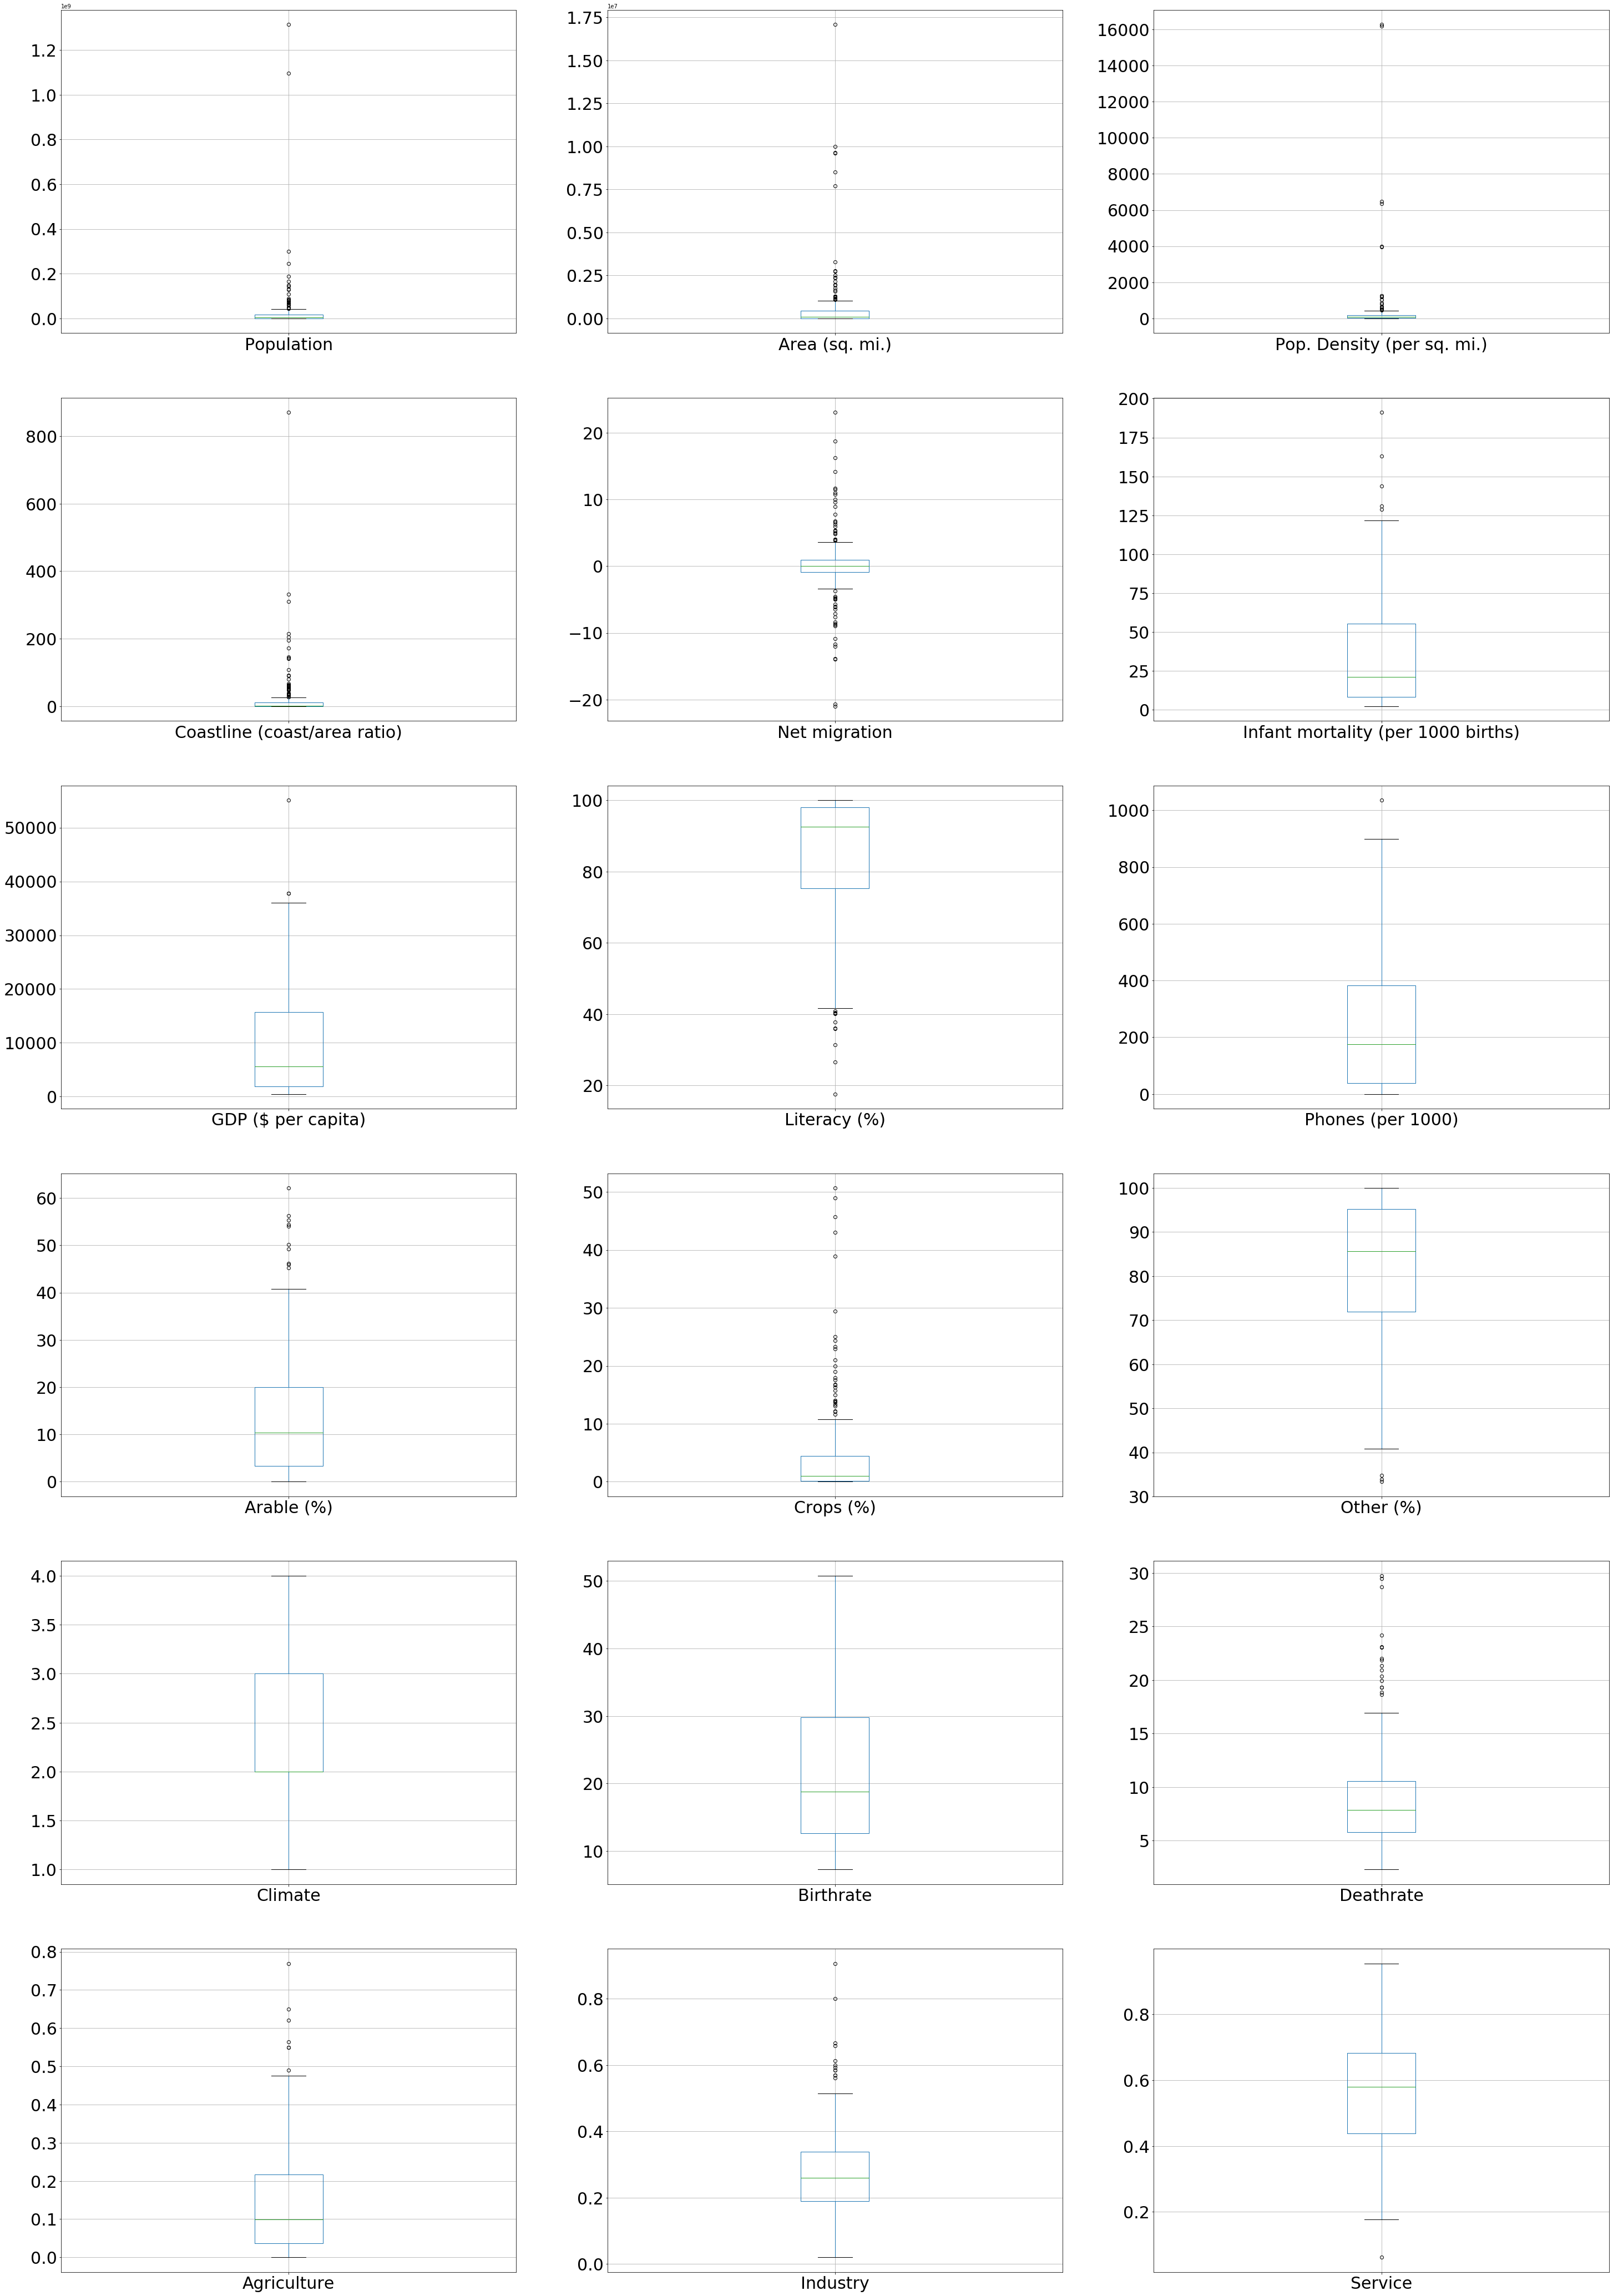

In [262]:
fig, axs = plt.subplots(6, 3, figsize=(50, 75))

i = 0
j = 0
for column in revised_data.columns[2:]:
        revised_data.boxplot(column = column, fontsize = 30, ax = axs[i,j])
        if j == 2:
            i += 1
            j = 0
        else:
            j += 1

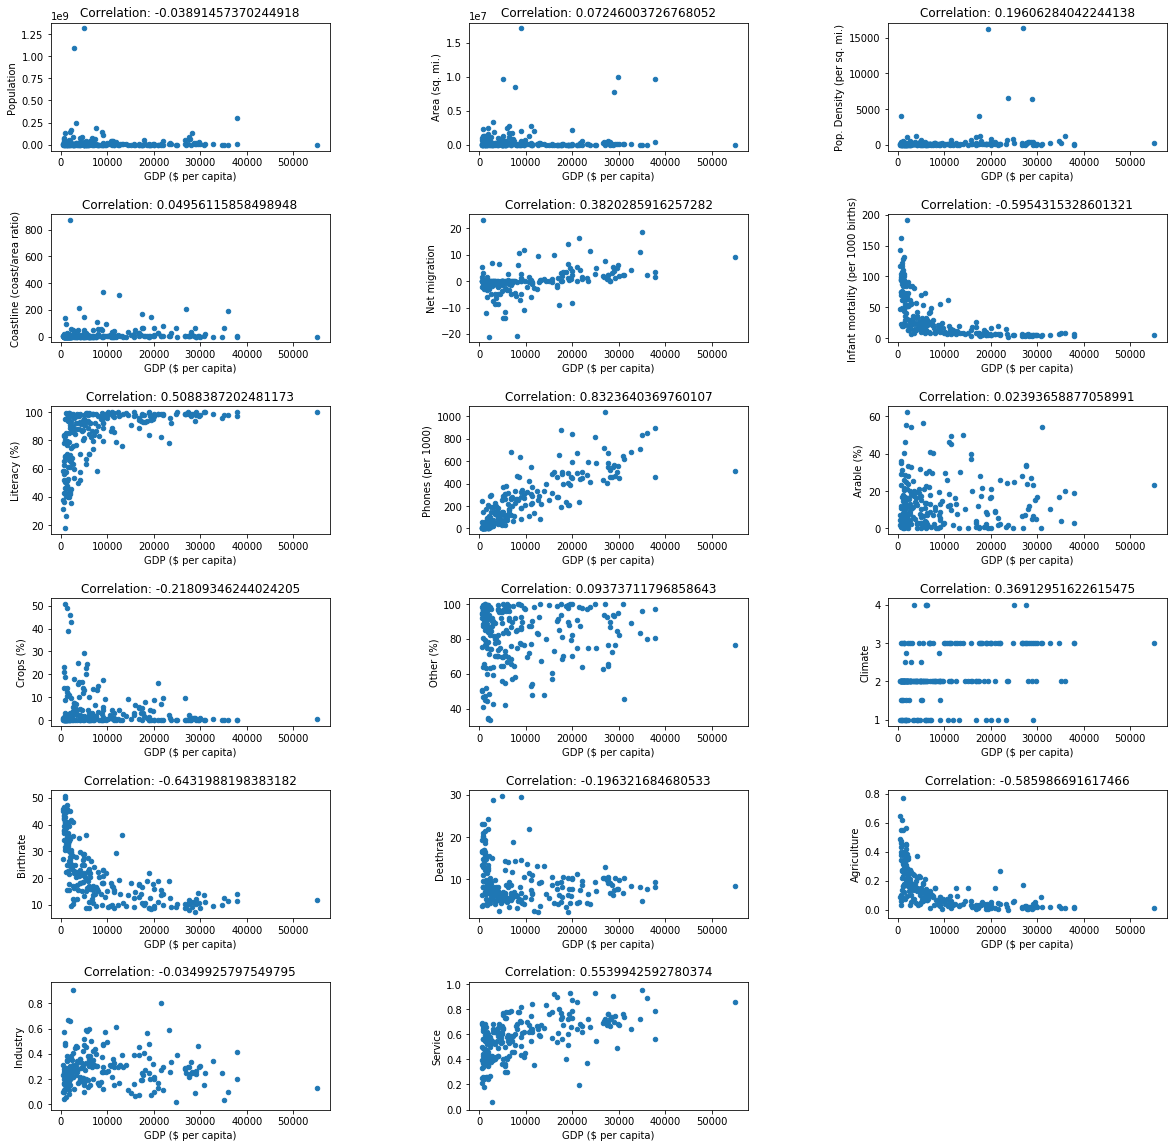

In [266]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20))
plt.subplots_adjust(hspace= .5, wspace = .5)

i = 0
j = 0
for column in revised_data.columns[2:]:
    if column == "GDP ($ per capita)":
        continue
    else:
        correlation = revised_data["GDP ($ per capita)"].corr(revised_data[column])
        revised_data.plot(x = "GDP ($ per capita)", y = column, kind = "scatter", title = "Correlation: " + str(correlation), ax = axs[i,j])
        if j == 2:
            i += 1
            j = 0
        else:
            j += 1
axs[5,2].set_visible(False)

#### The categories with highest positive correlation to GDP per capita are: Phones per 1000, Service, and Literacy % with 0.83, 0.55, and 0.51 correlation coefficients respectively.

#### The categories with highest negative correlation to GDP per capita are: Birthrate, Infant Mortality per 1000 births, and Agriiculture with -0.64, -0.60, -0.59 correlation coefficients respectively.

## Modeling

### Now, I will begin setting up the models by designating the training and testing sets. First, I use a label encoder to encode the "Region" and "Climate" categories into numerics so the model can incorporate them as features. Next, I designated 75% of our data for training leaving 25% for testing and opt to shuffle the data before splitting. Finally, I set the target to GDP per capita and use the rest of categories as features for the models.

In [324]:
model_data = revised_data
le = LabelEncoder()
model_data["Region Numeric"] = le.fit_transform(y = revised_data["Region"])
model_data["Climate Numeric"] = le.fit_transform(y = revised_data["Climate"])
model_data.head(10)

train, test = train_test_split(model_data, train_size = .75, shuffle = True)

target = "GDP ($ per capita)"

features = ["Population", "Area (sq. mi.)", "Pop. Density (per sq. mi.)", 
            "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", 
            "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", 
            "Birthrate", "Deathrate", "Agriculture", "Industry", "Service", "Region Numeric", "Climate Numeric"]
train_X = train[features]
train_y = train[target]
test_X = test[features]
test_y = test[target]

### Decision Tree Regressor Model

In [334]:
dt_model = DecisionTreeRegressor(random_state = 1)
dt_model.fit(train_X, train_y)
dt_val_predictions = dt_model.predict(test_X)

dt_val_mae = mean_absolute_error(dt_val_predictions, test_y)
print("Decision Tree Regressor Model Validation MAE : {:,.0f}".format(dt_val_mae))

dt_val_rmse = np.sqrt(mean_squared_error(dt_val_predictions, test_y))
print("Decision Tree Regressor Model Validation RMSE : {:,.0f}".format(dt_val_rmse))

Decision Tree Regressor Model Validation MAE : 3,775
Decision Tree Regressor Model Validation RMSE : 5,713


### Linear Regression Model

In [351]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)
lr_val_predictions = lr_model.predict(test_X)

lr_val_mae = mean_absolute_error(lr_val_predictions, test_y)
print("Linear Regression Model Validation MAE : {:,.0f}".format(lr_val_mae))

lr_val_rmse = np.sqrt(mean_squared_error(lr_val_predictions, test_y))
print("Linear Regression Model Validation RMSE : {:,.0f}".format(lr_val_rmse))

Linear Regression Model Validation MAE : 4,995
Linear Regression Model Validation RMSE : 7,269


## Conclusion

In [355]:
val_results = {"MAE": ["3,775", "4,995"], "RMSE": ["5,713", "7,269"]}
val_df = pd.DataFrame(val_results, index = ["Decision Tree Regressor Model", "Linear Regression Model"])
val_df

,MAE,RMSE
Decision Tree Regressor Model,"3,775","5,713"
Linear Regression Model,"4,995","7,269"


### The decision tree regressor model outperformed the linear regression model for both the MAE and RMSE. I would guess that the skewness of the target variable, GDP per capita, along with the collinearity among the features may have acted to make the linear regression less accurate. If I wanted to improve the linear regression model, I would perform some transformation on the GDP per capita data (as shown in the histogram) such that it would be more normally distributed. I would also look into picking specific categories of data to use as features and exluding others such that there was as little collinearity among them as possible or even begin to use feature engineering to create more desirable features from the categories of data. 